Объединяю таблицы

In [48]:
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s')
reg_data['reg_ts'] = reg_data.reg_ts.astype('datetime64[D]')
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s')
auth_data['auth_ts'] = auth_data.auth_ts.astype('datetime64[D]')

In [49]:
df = reg_data.merge(auth_data, how='inner', on='uid') 

In [50]:
df.head()

,reg_ts,uid,auth_ts
0,1998-11-18,1,1998-11-18
1,1999-07-22,2,1999-07-22
2,1999-07-22,2,1999-07-25
3,1999-07-22,2,1999-07-31
4,1999-07-22,2,1999-08-05


Функция для подсчета retention

In [51]:
def retention(df, begin, days):
    
    begin = begin  # Начальная дата
    end = begin + pd.Timedelta(days=days) # Сколько дней
    
    df = df.query('reg_ts >= @begin and auth_ts <= @end')\
        .groupby(['reg_ts', 'auth_ts'], as_index=False) \
        .agg(users=('uid', 'nunique'))
    
    df['day_delta'] = (df['auth_ts'] - df['reg_ts']).dt.days
       
    # Таблица
    retention = df.pivot_table(index='reg_ts', columns='day_delta', values='users')
    retention = retention.divide(retention.iloc[:, 0], axis=0)
    
       
    plt.figure(figsize=(30, 16))
    plt.title('Retention', fontsize=20)
    ax = sns.heatmap(data=retention, annot=True, vmin=0.0, vmax=0.25, fmt='.1%')
    ax.set_yticklabels(retention.index.strftime('%Y-%m-%d'), fontsize=10)
    plt.show()

In [17]:
print('Введите дату начала отсчета в формате год-месяц-день')
begin = pd.to_datetime(input())
print('Введите количество дней для расчета')
days = int(input())

Введите дату начала отсчета в формате год-месяц-день
2018-05-01
Введите количество дней для расчета
15


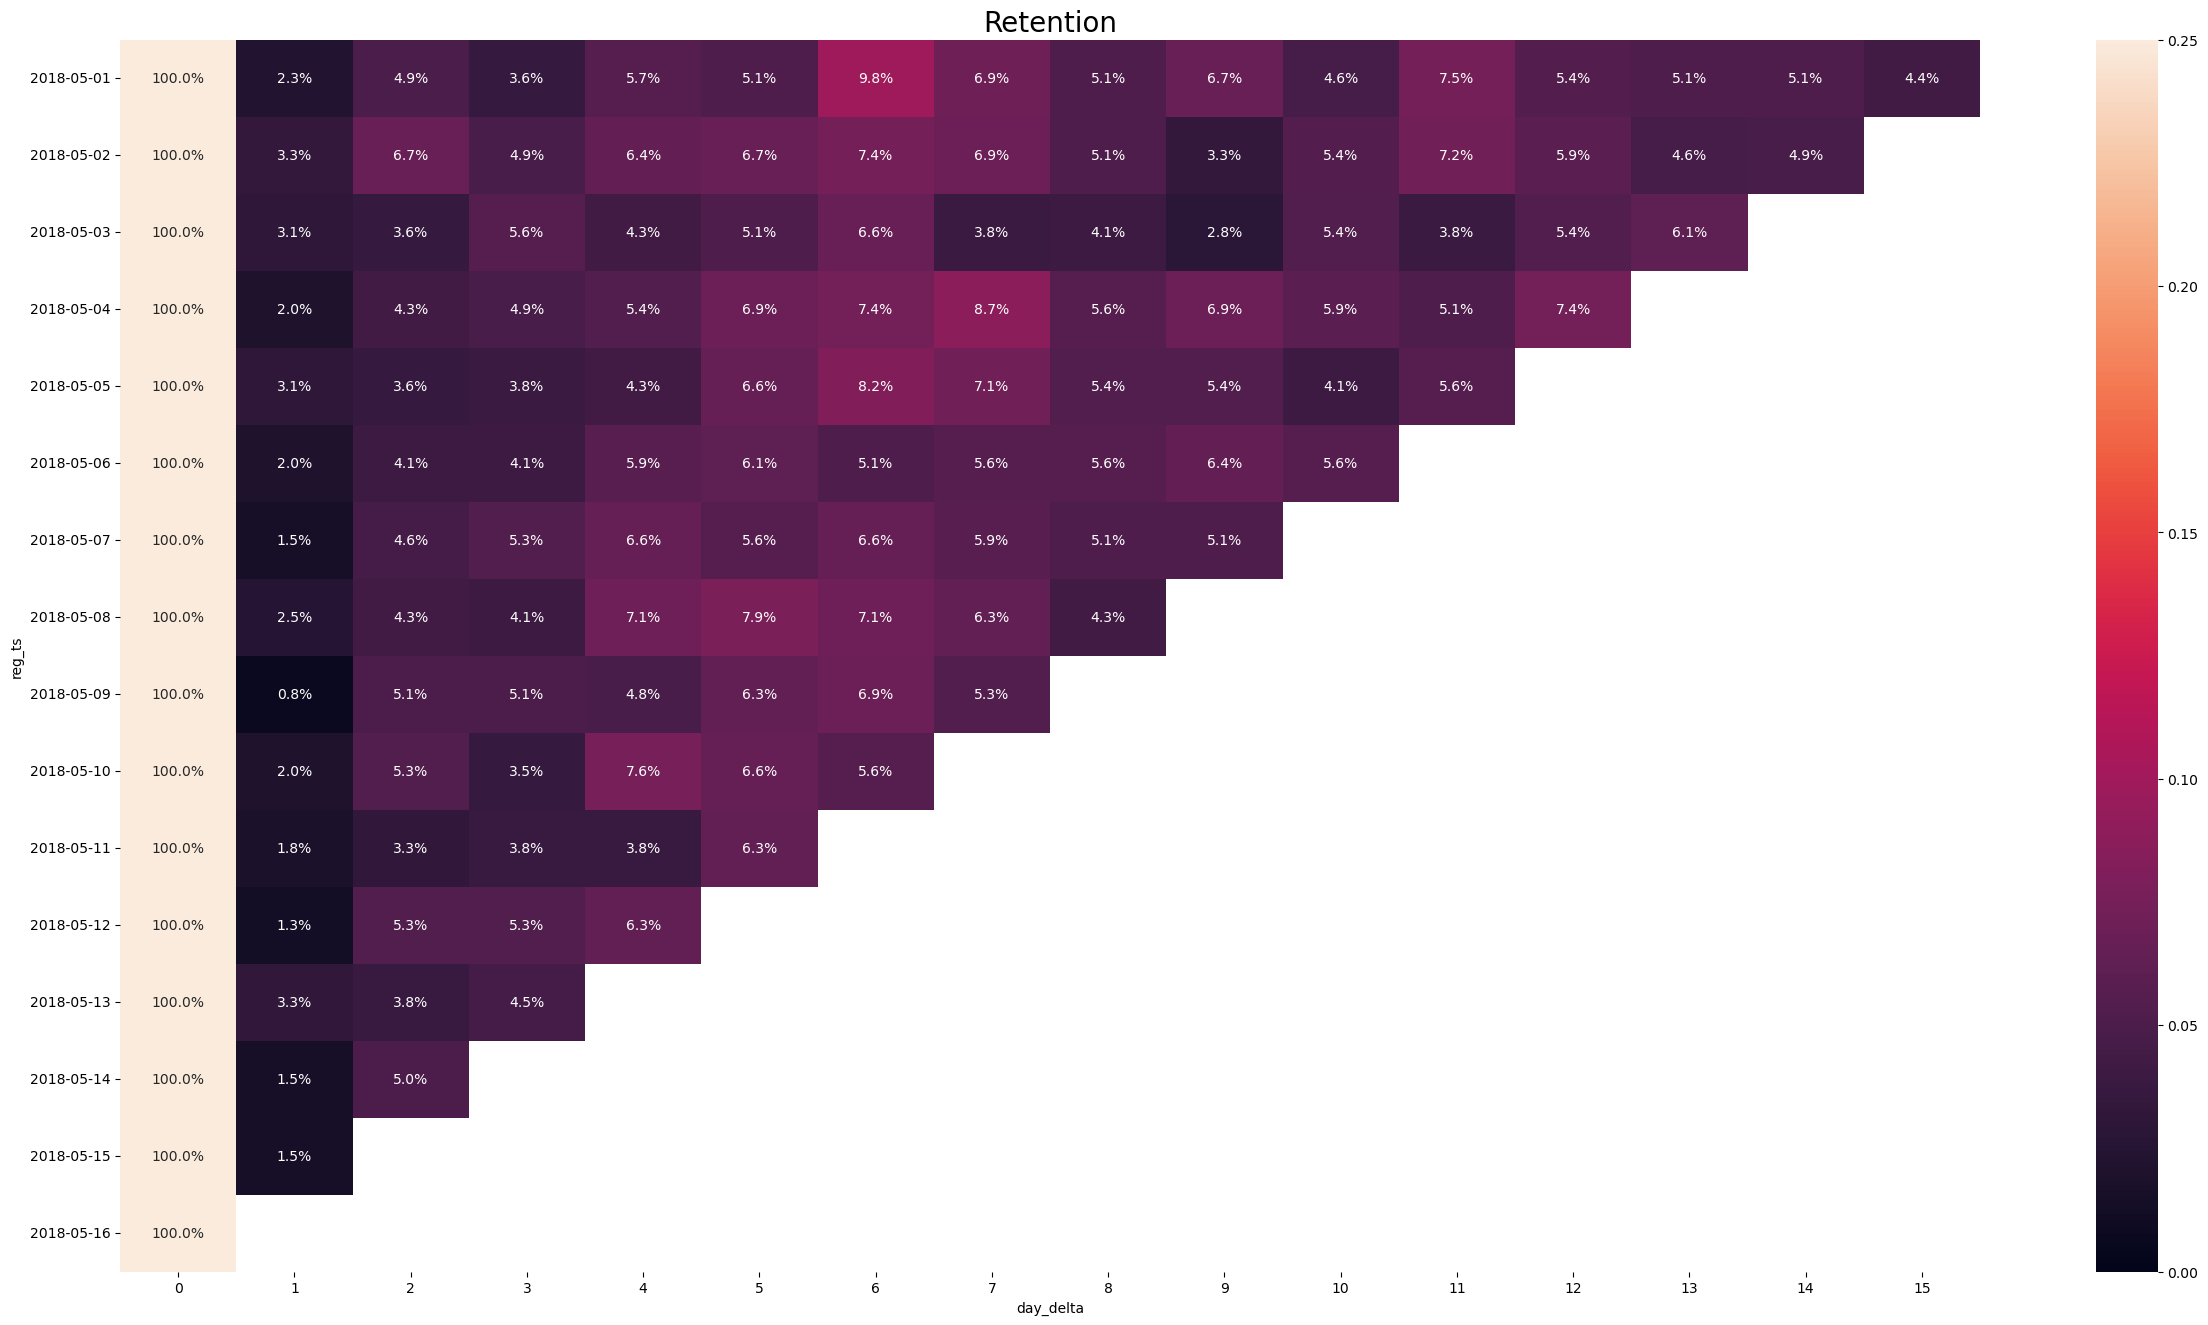

In [18]:
retention(df, begin, days)